In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Clustering analysis

In this notebook we analyze the results of the clustering algorithm applied to different data sets.

In [3]:
df1 = pd.read_csv('data/graph/cluster_sizes_all.csv', header=None, names=['clusterId', 'clusterSize'])
df2 = pd.read_csv('data/graph/cluster_sizes_no_candidates.csv', header=None, names=['clusterId', 'clusterSize'])
df3 = pd.read_csv('data/graph/cluster_sizes_no_twoplus.csv', header=None, names=['clusterId', 'clusterSize'])

We first compute general statistics for the three different data sets:

1) $\mathcal{F}$, the data set of all Bitcoin transactions between 2009-01-03 and 2017-08-10;
2) $\mathcal{N}_C$, the data set obtained by removing all candidate dust-consuming TXs from $\mathcal{F}$; 
3) $\mathcal{N}_{2+}$, the data set obtained by removing all 2+ dust-consuming TXs from $\mathcal{F}$.

In [4]:
d = {'F': df1, 'NC': df2, 'N2+': df3}
columns = ['name','numClusters','minSize','maxSize','avgSize','stdSize']
result = pd.DataFrame(columns=columns)
for k in d:
    df = d[k]
    numClusters = len(df)
    minSize = np.min(df.clusterSize)
    maxSize = np.max(df.clusterSize)
    avgSize = np.mean(df.clusterSize)
    stdSize = np.std(df.clusterSize)
    row = [k, numClusters, minSize, maxSize, avgSize, stdSize]
    result.loc[len(result)] = row
result

,name,numClusters,minSize,maxSize,avgSize,stdSize
0,F,139962731,1,12431337,2.099117,1193.882505
1,NC,140391544,1,12431337,2.092706,1187.955508
2,N2+,140623307,1,12431337,2.089257,1186.859881


Then we compute the cluster size distributions for all three data sets.

In [5]:
hist1, bins1 = np.histogram(df1.clusterSize, bins=100000)
hist2, bins2 = np.histogram(df2.clusterSize, bins=100000)
hist3, bins3 = np.histogram(df3.clusterSize, bins=100000)

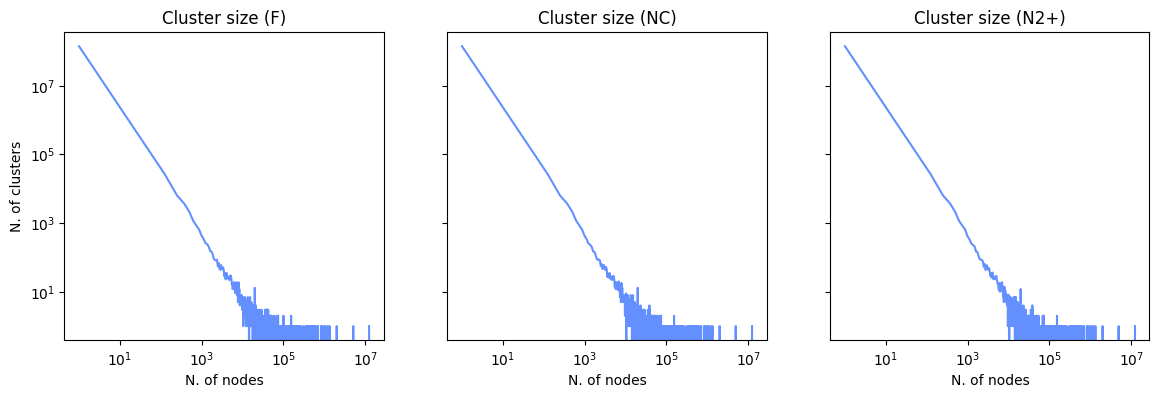

In [6]:
fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Cluster size (F)')
ax1.set_xlabel('N. of nodes')
ax1.set_ylabel('N. of clusters')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(bins1[:-1], hist1, color='#648fff')

ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax2.set_title('Cluster size (NC)')
ax2.set_xlabel('N. of nodes')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(bins2[:-1], hist2, color='#648fff')

ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)
ax3.set_title('Cluster size (N2+)')
ax3.set_xlabel('N. of nodes')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.plot(bins3[:-1], hist3, color='#648fff')

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.savefig("pictures/cluster-size.pdf", format='pdf', bbox_inches='tight')
plt.show()

Now we define four new data sets, obtained by comparing the clusters obtained with $\mathcal{F}$, $\mathcal{NC}$, and $\mathcal{N}_{2+}$.

To this aim, let us define:

1. $P(\mathcal{F})$ as the clustering obtained on data set $\mathcal{F}$;
2. $P(\mathcal{N}_C)$ as the clustering obtained on data set $\mathcal{N}_C$;
3. $P(\mathcal{N}_{2+})$ as the clustering obtained on data set $\mathcal{N}_{2+}$;

We now define $\mathit{diff}(X,Y) := P(X) \setminus P(Y)$ as the set of all clusters of $P(X)$ that are not part of $P(Y)$, for any $X, Y$.

We then compute four new sets of clusters, namely:

1. $\mathit{diff}(\mathcal{F},\mathcal{N}_{2+})$;
2. $\mathit{diff}(\mathcal{N}_{2+},\mathcal{F})$;
3. $\mathit{diff}(\mathcal{F},\mathcal{N}_{C})$;
4. $\mathit{diff}(\mathcal{N}_C,\mathcal{F})$;

In [9]:
X = pd.read_csv('data/graph/X_sizes.csv', header=None, names=['clusterId', 'clusterSize'])
Xp = pd.read_csv('data/graph/Xp_sizes.csv', header=None, names=['clusterId', 'clusterSize'])
Y = pd.read_csv('data/graph/Y_sizes.csv', header=None, names=['clusterId', 'clusterSize'])
Yp = pd.read_csv('data/graph/Yp_sizes.csv', header=None, names=['clusterId', 'clusterSize'])
d = {'diff(F, N2+)': X, 'diff(N2+, F)':Xp, 'diff(F, NC)':Y, 'diff(NC, F)':Yp}
columns = ['name','numClusters','minSize','maxSize','avgSize','stdSize']
result = pd.DataFrame(columns=columns)
for k in d:
    df = d[k]
    numClusters = len(df)
    minSize = np.min(df.clusterSize)
    maxSize = np.max(df.clusterSize)
    avgSize = np.mean(df.clusterSize)
    stdSize = np.std(df.clusterSize)
    row = [k, numClusters, minSize, maxSize, avgSize, stdSize]
    result.loc[len(result)] = row
result

,name,numClusters,minSize,maxSize,avgSize,stdSize
0,"diff(F, N2+)",45137,2,5089846,490.034606,26836.536873
1,"diff(N2+, F)",705713,1,4954411,31.342333,6639.323418
2,"diff(F, NC)",35094,2,5089846,362.538696,27672.846744
3,"diff(NC, F)",463907,1,4956574,27.425611,7415.205665


We now generate the plots of cluster size distributions for these four sets.

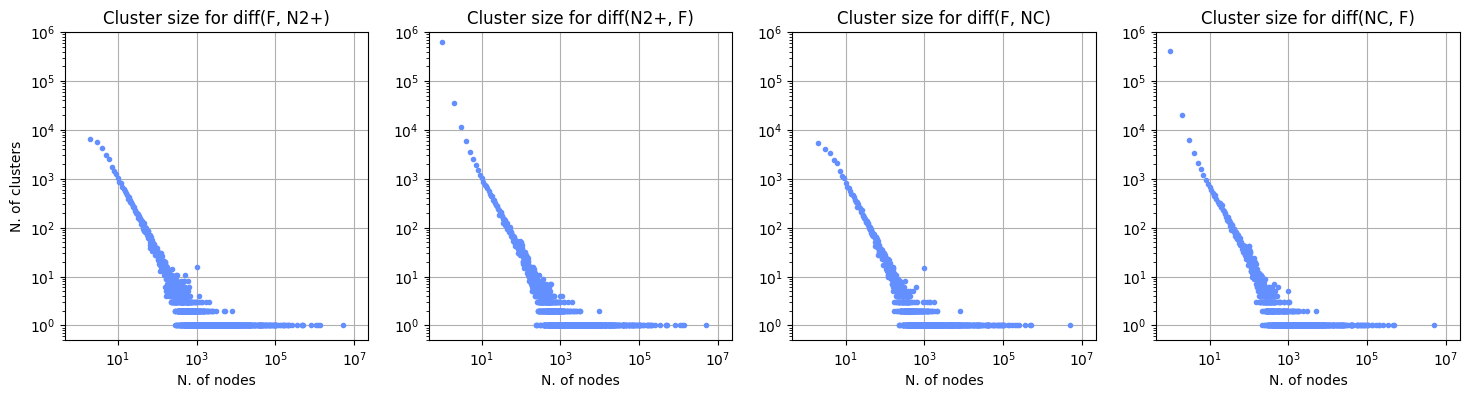

In [11]:
xvalues = [i for i in range(0, 10000000)]
yvalues_1 = X.clusterSize.value_counts().reindex(xvalues, fill_value=0).values
yvalues_2 = Xp.clusterSize.value_counts().reindex(xvalues, fill_value=0).values
yvalues_3 = Y.clusterSize.value_counts().reindex(xvalues, fill_value=0).values
yvalues_4 = Yp.clusterSize.value_counts().reindex(xvalues, fill_value=0).values

fig = plt.figure(figsize=(18,4))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title('Cluster size for diff(F, N2+)') # X = F-2+
ax1.set_xlabel('N. of nodes')
ax1.set_ylabel('N. of clusters')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(0.5, 1e6)
ax1.grid()
ax1.plot(xvalues, yvalues_1, '.', color='#648fff', rasterized=True)

ax2 = fig.add_subplot(1, 4, 2, sharey=ax1)
ax2.set_title('Cluster size for diff(N2+, F)')
ax2.set_xlabel('N. of nodes')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(0.5, 1e6)
ax2.grid()
ax2.plot(xvalues, yvalues_2, '.', color='#648fff', rasterized=True)

ax3 = fig.add_subplot(1, 4, 3, sharey=ax1)
ax3.set_title('Cluster size for diff(F, NC)')
ax3.set_xlabel('N. of nodes')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylim(0.5, 1e6)
ax3.grid()
ax3.plot(xvalues, yvalues_3, '.', color='#648fff', rasterized=True)

ax4 = fig.add_subplot(1, 4, 4, sharey=ax1)
ax4.set_title('Cluster size for diff(NC, F)')
ax4.set_xlabel('N. of nodes')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_ylim(0.5, 1e6)
ax4.grid()
ax4.plot(xvalues, yvalues_4, '.', color='#648fff', rasterized=True)

plt.savefig("pictures/cluster-size-diff.pdf", format='pdf', bbox_inches='tight')
plt.show()

Finally, we count the number of clusters of size 1 in $\mathit{diff}(\mathcal{N}_{2+}, \mathcal{F})$ and $\mathit{diff}(\mathcal{N}_{C}, \mathcal{F})$.

In [14]:
print(f'N. of clusters of size 1 in diff(N2+, F): {np.sum(Xp.clusterSize[Xp.clusterSize == 1])}\nN. of clusters of size 1 in diff(NC, F): {np.sum(Yp.clusterSize[Yp.clusterSize == 1])}')

N. of clusters of size 1 in diff(N2+, F): 623614
N. of clusters of size 1 in diff(NC, F): 414236
